In [24]:
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline
## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [25]:
df=pd.read_csv('lymphography.csv', delimiter=',',skiprows=[1])
df_cancer =df



In [26]:
X = df_cancer.drop(['class'], axis = 1) 
X.head()


,lymphatics,block of affere,bl. of lymph c,bl. of lymph s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of:,exclusion of no,no. of nodes in
0,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [27]:
y = df_cancer['class']
y.head()

scaler = StandardScaler()


In [28]:
#X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =20)
df

,class,lymphatics,block of affere,bl. of lymph c,bl. of lymph s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of:,exclusion of no,no. of nodes in
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
143,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
144,3,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
145,2,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [33]:
svclassifierlinear = SVC(kernel='linear')
svclassifierlinear.fit(X_train,y_train)
y_pred=svclassifierlinear.predict(X_test)
accuracy_score(y_test,y_pred)
filename = 'linear_svm_model.sav'
pickle.dump(svclassifierlinear, open(filename, 'wb'))
print("Accuracy= %f "%accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy= 0.830508 
[[29  4]
 [ 6 20]]
              precision    recall  f1-score   support

           2       0.83      0.88      0.85        33
           3       0.83      0.77      0.80        26

    accuracy                           0.83        59
   macro avg       0.83      0.82      0.83        59
weighted avg       0.83      0.83      0.83        59



In [30]:
y_pred


array([2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3], dtype=int64)

In [31]:
class_obt={2:'metastases',3:'malign lymph'}

In [9]:
X_test.iloc[1:2]

,lymphatics,block of affere,bl. of lymph c,bl. of lymph s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of:,exclusion of no,no. of nodes in
35,3,1,1,1,2,2,2,1,3,1,1,4,2,5,3,1,2,4


In [10]:
loaded_model = pickle.load(open(filename, 'rb'))
y_gotdata=loaded_model.predict(np.array(X_test.iloc[4:5]))
y_gotdata                               
#class_obt.get(y_gotdata[0])

array([2], dtype=int64)

In [11]:
X_test.iloc[4:5]

,lymphatics,block of affere,bl. of lymph c,bl. of lymph s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of:,exclusion of no,no. of nodes in
128,3,2,1,1,1,2,1,2,1,3,2,4,3,4,2,2,2,2


## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
from sklearn import metrics as mt
print("Accuracy= %f "%mt.accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

Accuracy= 0.762712 
[[27  6]
 [ 8 18]]
              precision    recall  f1-score   support

           2       0.77      0.82      0.79        33
           3       0.75      0.69      0.72        26

    accuracy                           0.76        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.76      0.76      0.76        59



## The best value for k

In [13]:
kscore=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    kscore.append(mt.accuracy_score(y_test,y_pred))
print(kscore)   

[0.7627118644067796, 0.7288135593220338, 0.7627118644067796, 0.7288135593220338, 0.7627118644067796, 0.7457627118644068, 0.7627118644067796, 0.7627118644067796, 0.7796610169491526, 0.8135593220338984, 0.8305084745762712, 0.8135593220338984, 0.8305084745762712, 0.8135593220338984]


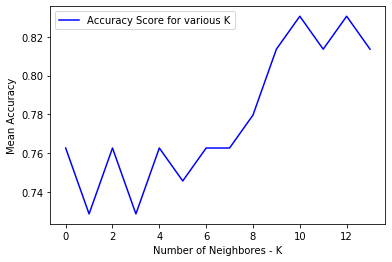

In [14]:
plt.plot(kscore, color='blue',label='Accuracy Score for various K')
plt.ylabel('Mean Accuracy')
plt.xlabel('Number of Neighbores - K')
plt.legend()
plt.show()

In [15]:
maxacc=np.array(kscore).max()
print(maxacc)

0.8305084745762712


In [16]:
for i in range(1,14):
    if kscore[i]==maxacc:
        print("Best value for K=%d"%(i+1))
        break
        
        

Best value for K=11


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn_pred1=knn.predict(X_test)
from sklearn import metrics as mt
print("Accuracy= %f "%mt.accuracy_score(y_test,knn_pred1))
print(confusion_matrix(y_test,knn_pred1))
print(classification_report(y_test,knn_pred1))

Accuracy= 0.830508 
[[30  3]
 [ 7 19]]
              precision    recall  f1-score   support

           2       0.81      0.91      0.86        33
           3       0.86      0.73      0.79        26

    accuracy                           0.83        59
   macro avg       0.84      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



##  Ramdom forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor =  RandomForestRegressor(n_estimators = 100,random_state= 0)
regressor.fit(X_train,y_train)
y_pred1=regressor.predict(X_test)
for i in range(0,len(y_pred1)):
    y_pred1[i]=round(y_pred1[i])
    
print(y_pred1)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 2. 2. 3. 2. 2. 2.
 2. 3. 2. 3. 2. 2. 3. 2. 3. 2. 3. 2. 3. 3. 3. 3. 3. 2. 3. 2. 2. 2. 3. 2.
 2. 3. 3. 3. 2. 3. 2. 2. 2. 3. 3.]
[[30  3]
 [ 6 20]]
              precision    recall  f1-score   support

           2       0.83      0.91      0.87        33
           3       0.87      0.77      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59

0.847457627118644


## Decision Tree

In [37]:
from sklearn import tree
from sklearn import metrics
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = metrics.accuracy_score(y_test, dtree_pred) * 100
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))
print(accuracy_score(y_test,dtree_pred))



[[26  7]
 [ 6 20]]
              precision    recall  f1-score   support

           2       0.81      0.79      0.80        33
           3       0.74      0.77      0.75        26

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59

0.7796610169491526


In [ ]:
import tkinter as tk
import pickle
import numpy as np
filename = 'linear_svm_model.sav'
class_obt={2:'metastases',3:'malign lymph'}
def on_configure(event):
    # update scrollregion after starting 'mainloop'
    # when all widgets are in canvas
    canvas.configure(scrollregion=canvas.bbox('all'))
root = tk.Tk()
root.geometry("1000x600")
canvas = tk.Canvas(root)
canvas.pack(side=tk.LEFT)

scrollbar = tk.Scrollbar(root, command=canvas.yview)
scrollbar.pack(side=tk.LEFT, fill='y')

canvas.configure(width=800,height=480,yscrollcommand = scrollbar.set)

# update scrollregion after starting 'mainloop'
# when all widgets are in canvas
canvas.bind('<Configure>', on_configure)
frame = tk.Frame(canvas)
canvas.create_window((0,0), window=frame, anchor='nw')
v = tk.StringVar()
v.set(1)  # initializing the choice, i.e. Python

v1 = tk.StringVar()
v1.set(1)  # initializing the choice, i.e. Python
v2 = tk.StringVar()
v2.set(1) 
v3 = tk.StringVar()
v3.set(1) 
v4 = tk.StringVar()
v4.set(1) 
v5 = tk.StringVar()
v5.set(1) 
v6 = tk.StringVar()
v6.set(1) 
v7 = tk.StringVar()
v7.set(1) 
v8 = tk.StringVar()
v8.set(1) 
v9 = tk.StringVar()
v9.set(1) 
v10 = tk.StringVar()
v10.set(1)
v11 = tk.StringVar()
v11.set(1) 
v12 = tk.StringVar()
v12.set(1)
v13 = tk.StringVar()
v13.set(1) 
v14 = tk.StringVar()
v14.set(1)
v15 = tk.StringVar()
v15.set(1) 
v16 = tk.StringVar()
v16.set(1) 
v17 = tk.StringVar()
v17.set(1) 
v18 = tk.StringVar()
v18.set(1) 
#valofall=''
afterdata='';

lympsites = [
    ("normal",1),
    ("arched",2),
    ("deformed",3),
    ("displaced",4)
]
block_of_affere = [
    ("no",1),
    ("yes",2)
]

bl_of_lymph_c = [
    ("no",1),
    ("yes",2)
]

bl_of_lymph_s = [
    ("no",1),
    ("yes",2)
]

by_pass = [
    ("no",1),
    ("yes",2)
]

extravasates = [
    ("no",1),
    ("yes",2)
]

regeneration = [
    ("no",1),
    ("yes",2)
]

early_uptake_in = [
    ("no",1),
    ("yes",2)
]

lym_nodes_dimin = [
    ("0",0),
    ("1",1),
    ("2",2),
    ("3",3)
]

lym_nodes_enlar = [
    ("0",1),
    ("1",2),
    ("2",3),
    ("3",4)
]

changes_in_lym = [
    ("bean",1),
    ("oval",2),
    ("round",3)
]
defect_in_node = [
    ("no",1),
    ("lacunar",2),
    ("lac. marginal",3),
    ("lac. central",4)
]
changes_in_node = [
   ("no",1),
    ("lacunar",2),
    ("lac. marginal",3),
    ("lac. central",4)
]

changes_in_stru = [
    ("no",1),
    ("grainy",2),
    ("drop-like",3),
    ("coarse",4),
    ("diluted",5),
    ("reticular",6),
    ("stripped",6),
    ("faint",7),
]

special_forms=[
    ("no",1),
    ("chalices",2),
    ("vesicles",3)
]

dislocation_of= [
    ("no",1),
    ("yes",2)
]
exclusion_of= [
    ("no",1),
    ("yes",2)
]


no_of_nodes_in = [
    ("0-9",1),
    ("10-19",2),
    ("20-29",3),
    ("30-39",4),
    ("40-49",5),
    ("50-59",6),
    ("60-69",6),
    (">=70",7),
]

def ShowChoice():
    l.config(text="predicted cancer is ")
    #global valofall
    valofall=''
    test_list =[]
    valofall=v1.get()+','+v2.get()+','+v3.get()+','+v4.get()+','+v5.get()+','+v6.get()+','+v7.get()+','+v8.get()+','+v9.get()+','+v10.get()+','+v11.get()+','+v12.get()+','+v13.get()+','+v14.get()+','+v15.get()+','+v16.get()+','+v17.get()+','+v18.get()
    print(valofall)
    valofsplit=valofall.split(",")
    print(valofsplit)
    for i in range(0, len(valofsplit)): 
        test_list.append(int(valofsplit[i]))
        #print(test_list)
    
    #X_std = scaler.fit_transform(X)
    print(test_list)
    print(np.array([test_list]))
    loaded_model = pickle.load(open(filename, 'rb'))
    y_gotdata=loaded_model.predict(np.array([test_list]))
    print(y_gotdata[0])
    print(class_obt.get(y_gotdata[0]))
    l.config(text="predicted cancer is "+class_obt.get(y_gotdata[0]))
    
tk.Label(frame, 
         text="""Choose your  
lymphatics:""",
         justify = tk.CENTER,
         padx = 2).pack()

for language in enumerate(lympsites):
    tk.Radiobutton(frame, 
                  text=language[1][0]+"",
                  padx = 20, 
                  variable=v1, 
                  
                  value=language[1][1]).pack(anchor=tk.W)

tk.Label(frame, 
         text="""Choose block_of_affere""",
         justify = tk.LEFT,
         padx = 2).pack()

for language in enumerate(block_of_affere):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v2, 
                  value=language[1][1]).pack(anchor=tk.W)

tk.Label(frame, 
         text="""Choose bl_of_lymph_c""",
         justify = tk.LEFT,
         padx = 2).pack()
for language in enumerate(bl_of_lymph_c):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v3, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose bl_of_lymph_s""",
         justify = tk.LEFT,
         padx = 2).pack()

for language in enumerate(bl_of_lymph_s):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v4, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose by_pass""",
         justify = tk.LEFT,
         padx = 2).pack()

for language in enumerate(by_pass):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v5, 
                  value=language[1][1]).pack(anchor=tk.W)
    
tk.Label(frame, 
         text="""Choose extravasates""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(extravasates):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v6, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose regeneration""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(regeneration):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v7, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose early_uptake_in""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(early_uptake_in):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v8, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose lym_nodes_dimin""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(lym_nodes_dimin):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v9, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose lym_nodes_enlar""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(lym_nodes_enlar):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v10, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose changes_in_lym""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(changes_in_lym):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v11, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose defect_in_node""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(defect_in_node):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v12, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose changes_in_node""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(changes_in_node):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v13, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose changes_in_stru""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(changes_in_stru):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v14, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose special_forms""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(special_forms):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v15, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose dislocation_of""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(dislocation_of):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v16, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose exclusion_of""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(exclusion_of):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v17, 
                  value=language[1][1]).pack(anchor=tk.W)
tk.Label(frame, 
         text="""Choose no_of_nodes_in""",
         justify = tk.LEFT,
         padx =2).pack()    
for language in enumerate(no_of_nodes_in):
    tk.Radiobutton(frame, 
                  text=language[1][0],
                  padx = 20, 
                  variable=v18, 
                  value=language[1][1]).pack(anchor=tk.W)

l = tk.Label(frame,text="")
l.pack()    
B = tk.Button(frame, text ="Submit and get predicted cancer", command = ShowChoice)
B.pack()
root.mainloop()